<h1>
<font color="#ff2e2e">
Mask Overlay
</font>
</h1>

In [64]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import dlib

In [2]:
!wget -nd https://github.com/JeffTrain/selfie/raw/master/shape_predictor_68_face_landmarks.dat

--2023-04-28 15:59:49--  https://github.com/JeffTrain/selfie/raw/master/shape_predictor_68_face_landmarks.dat
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/JeffTrain/selfie/master/shape_predictor_68_face_landmarks.dat [following]
--2023-04-28 15:59:49--  https://raw.githubusercontent.com/JeffTrain/selfie/master/shape_predictor_68_face_landmarks.dat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 99693937 (95M) [application/octet-stream]
Saving to: ‘shape_predictor_68_face_landmarks.dat’

shape_predictor_68_ 100%[===================>]  95.08M   225MB/s    in 0.4s    

2023-04-28 15:59:53 (2

<h3><font color = "#079e05"> This function is used to plot your result </font></h3>

In [65]:
def plotter(img_list, r, w, gray, wr, hr, fig_name = None):
    '''
    Plots images' list with its' caption and saves result image if you want.

    Parameters:
        img_list (list): The list of tuples of image and its' caption.
        r (int): The number of row(s).
        w (int): The number of colunm(s).
        gray (bool): The flag for plotting images in grayscale mode.
        wr (int): The width of one figure.
        hr (int): The height of one figure.
        fig_name (str): The name of the image of the plot. if not set this parameter the plot doesn't save.
    '''
    
    plt.rcParams['figure.figsize'] = (wr, hr)
    for i in range(len(img_list)):
        plt.subplot(r, w, i + 1)
        if img_list[i][2] == 'img':
            if gray:
                plt.imshow(img_list[i][0], cmap = 'gray')
            else:
                plt.imshow(img_list[i][0])
            plt.xticks([])
            plt.yticks([])
        elif img_list[i][2] == 'hist':
            plt.bar(np.arange(len(img_list[i][0])), img_list[i][0], color = 'c')
        else:
            raise Exception("Only image or histogram. Use third parameter of tuples in img_list and set it to img or hist.")
        plt.title(img_list[i][1])
    if fig_name is not None:
        plt.savefig(fig_name + '.png')
    plt.show()

<h3><font color = "#079e05"> Complete put_mask function </font></h3>

In [66]:
def put_mask(face, mask):
    '''
    Adds mask image on face image.
    
    Parameters:
        face (numpy.ndarray): face image.
        mask (numpy.ndarray): mask image.
    
    Returns:
        numpy.ndarray: The result image.
    '''

    #############
    # Your code #
    # https://learnopencv.com/using-facial-landmarks-for-overlaying-faces-with-masks/
    # https://medium.com/mlearning-ai/facial-mask-overlay-with-opencv-dlib-4d948964cc4d
    
    # Step #1: Localize the face in the image.
    result = face.copy()
    # Initialize dlib's face detector
    detector = dlib.get_frontal_face_detector()

    faces = detector(face, 1)
    # print("Number of faces detected: ", len(faces)) 1


    # Step #2: Detect the key facial structures on the face ROI.
    # Initialize dlib's shape predictor
    predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

    # try to finde good points
    # src_points = np.array([[(620, 102), (625, 700), (200, 220), (986, 209)]],np.float32)
    # src_points = np.array([[(620, 102), (625, 700), (100, 211), (986, 209)]],np.float32) # left_point = 1
    # src_points = np.array([[(620, 102), (625, 700), (143, 411), (986, 209)]],np.float32)
    # src_points = np.array([[(620, 102), (625, 700), (143, 411), (1095, 221)]],np.float32)
    src_points = np.array([[(620, 102), (625, 700), (143, 411), (1022, 217)]],np.float32)

    nose_point = 28 # 29
    chin_point = 9 # 8
    left_point = 2 # 1 
    right_point = 15 # 14

    detected_face = faces[0]
    # Get the shape using the predictor
    landmarks = predictor(face, detected_face)
    left = np.array([landmarks.part(left_point).x, landmarks.part(left_point).y], np.float32)
    nose = np.array([landmarks.part(nose_point).x, landmarks.part(nose_point).y], np.float32)
    right = np.array([landmarks.part(right_point).x, landmarks.part(right_point).y], np.float32)
    chin = np.array([landmarks.part(chin_point).x, landmarks.part(chin_point).y], np.float32)
    
    dest_points = np.array([nose, chin, left, right], np.float32)


    # Step #3: Blend the mask and the face ROI together.
    # Find the transformation matrix between the face and mask points
    transformation_matrix = cv2.getPerspectiveTransform(src_points, dest_points)

    # Warp the mask image into the face image
    mask_warped = cv2.warpPerspective(mask, transformation_matrix, (face.shape[1], face.shape[0]))

    # # Combine the face and mask images
    result = np.where(mask_warped == [0, 0, 0], face, mask_warped)
    # result = cv2.addWeighted(face, 1, mask_warped, 0.7, 0)
    #############
    
    return result

<h3><font color = "#079e05"> Show the result </font></h3>

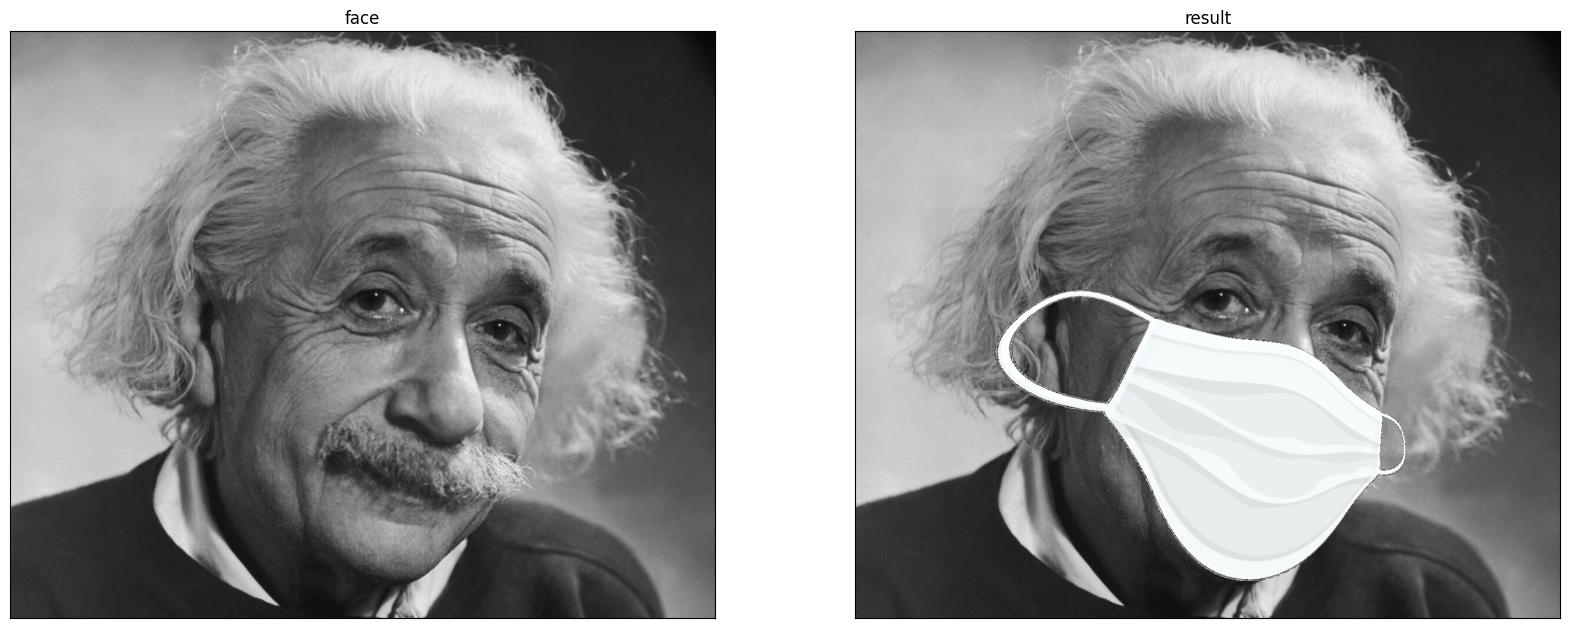

In [67]:
image_list = []
face = cv2.cvtColor(cv2.imread(os.path.join('images/Q3', 'face.jpg')), cv2.COLOR_BGR2RGB)
mask = cv2.cvtColor(cv2.imread(os.path.join('images/Q3', 'mask.jpg')), cv2.COLOR_BGR2RGB)
image_list.append([face, 'face', 'img'])
image_list.append([put_mask(face, mask), 'result', 'img'])
plotter(image_list, 1, 2, True, 20, 10, '3')